# Case Itau Rascunho

## 1. Importar bibliotecas

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 2. Importar arquivos

In [10]:
rain_aus=pd.read_csv('./Case-itau/data/rain_data_aus.csv')
wind_01=pd.read_csv('./Case-itau/data/wind_table_01.csv')
wind_02=pd.read_csv('./Case-itau/data/wind_table_02.csv')
wind_03=pd.read_csv('./Case-itau/data/wind_table_03.csv')
wind_04=pd.read_csv('./Case-itau/data/wind_table_04.csv')
wind_05=pd.read_csv('./Case-itau/data/wind_table_05.csv')
wind_06=pd.read_csv('./Case-itau/data/wind_table_06.csv')
wind_07=pd.read_csv('./Case-itau/data/wind_table_07.csv')
wind_08=pd.read_csv('./Case-itau/data/wind_table_08.csv')
rain_aus.head(3)

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,...,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580


## 3. Exploring data

In [11]:
rain_aus.shape

(142193, 23)

In [12]:
wind_01.shape, wind_02.shape, wind_03.shape, wind_04.shape, wind_05.shape, wind_06.shape, wind_07.shape, wind_08.shape

((20000, 8),
 (20000, 8),
 (20000, 8),
 (20000, 8),
 (20000, 8),
 (20000, 8),
 (22193, 8),
 (22193, 8))

In [13]:
wind_01.columns=wind_03.columns
wind_02.columns=wind_03.columns

In [14]:
frames=[wind_01, wind_02, wind_03, wind_04, wind_05, wind_06, wind_07, wind_08]

In [15]:
wind = pd.concat(frames)
wind.head()

,date,location,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,2007-11-01,Canberra,NW,30.0,SW,NW,6.0,20.0
1,2007-11-02,Canberra,ENE,39.0,E,W,4.0,17.0
2,2007-11-03,Canberra,NW,85.0,N,NNE,6.0,6.0
3,2007-11-04,Canberra,NW,54.0,WNW,W,30.0,24.0
4,2007-11-05,Canberra,SSE,50.0,SSE,ESE,20.0,28.0


In [16]:
rain_aus.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'amountOfRain', 'raintomorrow', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente'],
      dtype='object')

In [17]:
wind.columns

Index(['date', 'location', 'windgustdir', 'windgustspeed', 'winddir9am',
       'winddir3pm', 'windspeed9am', 'windspeed3pm'],
      dtype='object')

#### Convertendo coluna de strings em numerica 0 e 1

In [19]:
rain_aus['raintoday'] = rain_aus['raintoday'].replace('No', 0).replace('Yes', 1)
rain_aus['raintomorrow'] = rain_aus['raintomorrow'].replace('No', 0).replace('Yes', 1)

### Drop Nan no df

In [24]:
rain_aus.isna().sum()

date                    0
location                0
mintemp               637
maxtemp               322
rainfall             1406
evaporation         60843
sunshine            67816
humidity9am          1774
humidity3pm          3610
pressure9am         14014
pressure3pm         13981
cloud9am            53657
cloud3pm            57094
temp9am               904
temp3pm              2726
raintoday            1406
amountOfRain            0
raintomorrow            0
temp                  322
humidity             3610
precipitation3pm        0
precipitation9am        0
modelo_vigente          0
dtype: int64

In [22]:
rain_aus_na=rain_aus.dropna()

In [44]:
wind_na=wind.dropna()

In [23]:
rain_aus_na.shape

(61918, 23)

#### Concatenando df's rain e wind em um só pelas colunas (location e Data)

In [45]:
data = pd.merge(rain_aus_na, wind_na, on=['date','location'])
data.head(3)

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0.0,0.0,0,44.24,17.6,5,15.165784,0.011320,SSW,48.0,ENE,SW,6.0,20.0
1,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0.0,0.0,0,36.68,11.6,9,9.750834,0.001683,S,37.0,SSE,SSE,19.0,19.0
2,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0.0,0.0,0,47.12,28.4,11,5.557986,0.061026,NNE,46.0,NNE,NNW,30.0,15.0


## 3.2 Using Heatmap to find correlations between data

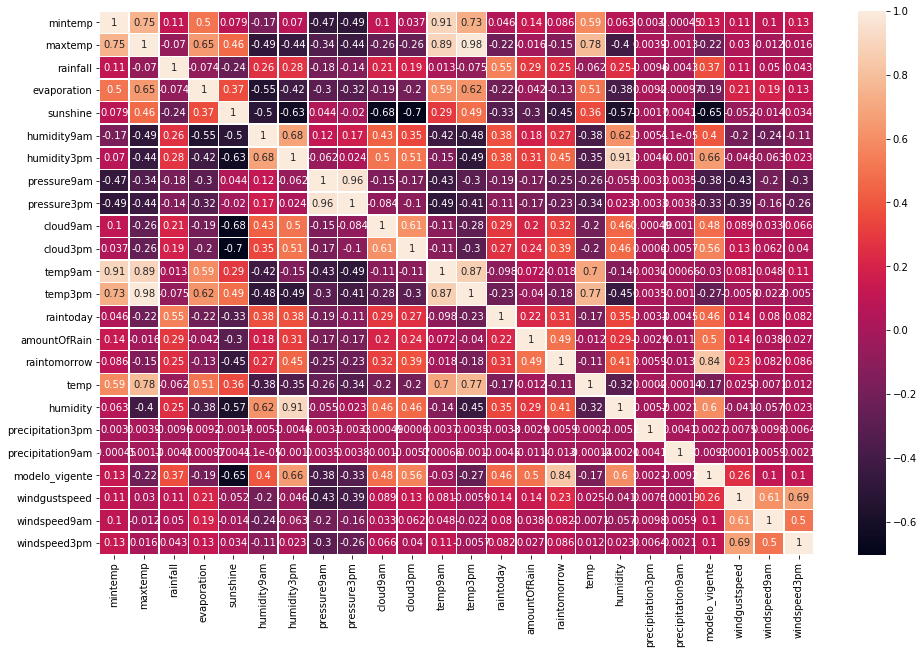

In [46]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(data.corr(),annot=True,linewidths=.5)

## 4. Regressão Logistica

In [47]:
pd.set_option("display.max_columns", len(data.columns)) 

In [48]:
data.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0.0,0.0,0,44.24,17.6,5,15.165784,0.011320,SSW,48.0,ENE,SW,6.0,20.0
1,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0.0,0.0,0,36.68,11.6,9,9.750834,0.001683,S,37.0,SSE,SSE,19.0,19.0
2,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0.0,0.0,0,47.12,28.4,11,5.557986,0.061026,NNE,46.0,NNE,NNW,30.0,15.0
3,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0.0,0.0,0,48.08,28.4,10,17.820001,0.010724,WNW,31.0,WNW,WSW,6.0,6.0
4,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0.0,0.0,0,51.20,20.0,9,13.217116,0.103292,WNW,35.0,NW,WNW,17.0,13.0


In [49]:
numeric = ['mintemp','maxtemp','rainfall','evaporation','sunshine','humidity9am','humidity3pm','pressure9am','pressure3pm','temp9am','temp3pm','temp','humidity','precipitation3pm','precipitation9am','raintoday','raintomorrow', 'cloud9am','cloud3pm','windgustspeed','windspeed9am','windspeed3pm']
numeric2=['mintemp','maxtemp','rainfall','evaporation','sunshine','humidity9am','humidity3pm','pressure9am','pressure3pm','temp9am','temp3pm','temp','humidity','precipitation3pm','precipitation9am','raintoday', 'cloud9am','cloud3pm','windgustspeed','windspeed9am','windspeed3pm']

In [50]:
A=data[numeric]
X=A.drop(columns=['raintomorrow'])
y=pd.DataFrame(A['raintomorrow'])

In [51]:
from sklearn.linear_model import LogisticRegression

modelo=LogisticRegression()

In [52]:
X=data[numeric].drop(columns=['raintomorrow'])
y=data['raintomorrow']

In [53]:
modelo.fit(X,y)

C:\Users\victo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
modelo.score(X,y)

0.8493085904376753

## 4.1 Plotando o resultado em Confusion matrix

In [56]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, precision_score, recall_score, f1_score,accuracy_score

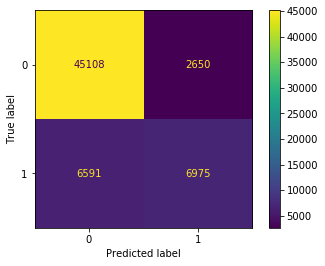

In [57]:
plot_confusion_matrix(modelo, X,y, values_format='.0f')

#### Acuracia

In [58]:
modelo.score(X,y)

0.8493085904376753

#### Precisão

In [59]:
y_pred=modelo.predict(X)

In [60]:
precision_score(y,y_pred)

0.7246753246753247

#### Recall

In [62]:
recall_score(y,y_pred)

0.5141530296329058

#### f1 score

In [63]:
f1_score(y,y_pred)

0.6015264542279332

### 4.2 Agora, vamos tornar o nosso modelo mais complexo

In [65]:
from sklearn import datasets
from sklearn.metrics import precision_score, recall_score, roc_auc_score, plot_roc_curve
from sklearn.datasets import make_classification

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
X_train.shape

(49059, 21)

In [68]:
X_test.shape

(12265, 21)

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)


X_test = scaler.transform(X_test)

### 4.4 Aplicar LogisticRegression com modelo mais complexo

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve

logistic = LogisticRegression(n_jobs=-1)
logistic.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

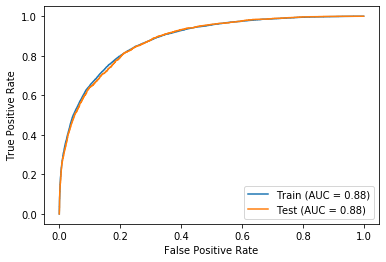

In [72]:
fig, ax = plt.subplots()

plot_roc_curve(logistic, X_train, y_train, ax=ax, name='Train')
plot_roc_curve(logistic, X_test, y_test, ax=ax, name='Test')

In [73]:
X.corr()

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,temp,humidity,precipitation3pm,precipitation9am,raintoday,cloud9am,cloud3pm,windgustspeed,windspeed9am,windspeed3pm
mintemp,1.000000,0.751131,0.108920,0.504563,0.078985,-0.172991,0.069594,-0.466959,-0.487898,0.906678,0.728575,0.585605,0.062698,0.003044,-0.000448,0.046411,0.104685,0.037394,0.111325,0.099693,0.134473
maxtemp,0.751131,1.000000,-0.070474,0.645171,0.464880,-0.488880,-0.444525,-0.340065,-0.441244,0.894113,0.984556,0.780458,-0.404043,0.003950,-0.001311,-0.221972,-0.261306,-0.261202,0.030005,-0.011993,0.015914
rainfall,0.108920,-0.070474,1.000000,-0.074045,-0.242960,0.261640,0.275481,-0.179367,-0.135641,0.013191,-0.075299,-0.061899,0.252958,-0.009644,-0.004275,0.550403,0.214724,0.188844,0.105783,0.049685,0.043294
evaporation,0.504563,0.645171,-0.074045,1.000000,0.365619,-0.549290,-0.415304,-0.295733,-0.323086,0.590351,0.623806,0.505210,-0.376074,0.009231,-0.000972,-0.215441,-0.193361,-0.199779,0.206127,0.190176,0.127353
sunshine,0.078985,0.464880,-0.242960,0.365619,1.000000,-0.498152,-0.627710,0.044250,-0.019505,0.290785,0.486674,0.359636,-0.571155,-0.001739,0.004112,-0.325735,-0.676787,-0.703123,-0.052478,-0.013522,0.033990
humidity9am,-0.172991,-0.488880,0.261640,-0.549290,-0.498152,1.000000,0.682516,0.117002,0.173397,-0.419391,-0.479974,-0.382191,0.620706,-0.005130,0.000041,0.377567,0.433127,0.345627,-0.196586,-0.240400,-0.107701
humidity3pm,0.069594,-0.444525,0.275481,-0.415304,-0.627710,0.682516,1.000000,-0.061850,0.024021,-0.151021,-0.494088,-0.347821,0.909306,-0.004565,-0.000998,0.381983,0.504211,0.508928,-0.045567,-0.062997,0.022707
pressure9am,-0.466959,-0.340065,-0.179367,-0.295733,0.044250,0.117002,-0.061850,1.000000,0.961335,-0.433974,-0.299276,-0.262955,-0.054818,-0.003109,0.003460,-0.187663,-0.151748,-0.165347,-0.434927,-0.202079,-0.295709
pressure3pm,-0.487898,-0.441244,-0.135641,-0.323086,-0.019505,0.173397,0.024021,0.961335,1.000000,-0.491718,-0.410349,-0.342480,0.023314,-0.003299,0.003799,-0.105297,-0.084141,-0.102970,-0.388885,-0.156239,-0.256598
temp9am,0.906678,0.894113,0.013191,0.590351,0.290785,-0.419391,-0.151021,-0.433974,-0.491718,1.000000,0.870990,0.698298,-0.137038,0.003672,0.000664,-0.097624,-0.108630,-0.111310,0.080846,0.047931,0.114723


In [74]:
pd.DataFrame(zip(logistic.coef_[0], X.columns), columns=['coef','variables']).sort_values(by='coef')

,coef,variables
8,-1.348100,pressure3pm
4,-0.544215,sunshine
0,-0.290992,mintemp
20,-0.215768,windspeed3pm
19,-0.119216,windspeed9am
16,-0.065880,cloud9am
14,-0.033136,precipitation9am
3,-0.024009,evaporation
12,-0.016363,humidity
11,-0.010084,temp


## 4.5 Plotando o modelo mais complexo em Confusion matrix